### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# 결측치 확인
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
data.describe(include = "object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [6]:
# 결측치 - Mileage
data[data['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [7]:
# Mileage는 모델명마다 동일함 -> 결측치의 해당모델과 모델명이 일치하는 행을 찾아 결측치를 매꾸기 위한 탐색
pd.concat([data[data['Name']=='Mahindra E Verito D4'],data[data['Name']=='Toyota Prius 2009-2016 Z4']])

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [8]:
# Mileage에 결측치를 갖고 있는 모델명이 유일함으로 대체 불가능-> 삭제
data.drop([data.index[4446],data.index[4904]], inplace= True)
data = data.reset_index()
del data['index']

In [9]:
del data['Unnamed: 0']

In [10]:
# 결측치 - Engine, Power ... 총 표본수가 36개이므로 그냥 드롭하도록 한다..
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


In [11]:
del data['New_Price']
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6013,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6014,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6015,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [12]:
data.dropna(axis = 0 , how = 'any',subset =['Engine','Power', 'Seats'],inplace = True)
data = data.reset_index()
del data['index']
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [13]:
# [Mileage, Engine, Power]의 type을 object -> numeric으로 변경
data['Mileage'] = data['Mileage'].apply(lambda x : x.split()[0])
data['Engine'] = data['Engine'].apply(lambda x : x.split()[0])
data['Power'] = data['Power'].apply(lambda x : x.split()[0])

In [14]:
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')

In [15]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
dtype: int64

In [16]:
data.dropna(axis = 0 , how = 'any',subset =['Power'],inplace = True)
data= data.reset_index()
del data['index']

data.isnull().sum()



Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
# Name 변수를 브랜드로 분리
data['Brand']= data['Name'].apply(lambda s : s.split()[0])


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
 12  Brand              5872 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 596.5+ KB


In [19]:
# Year은 범주형 변수로 보는게 맞다고 판단하여 dtype 변경
data['Year'] = data['Year'].astype('object')

In [20]:
category_col = []
numerical_col = []
for column in data.columns:
    if data[column].dtype == object:
        category_col.append(column)
    else :
        numerical_col.append(column)
        
print("Category_col : ",category_col)
print("Numerical_col : ",numerical_col)

Category_col :  ['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']
Numerical_col :  ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [21]:
y= data['Price']

In [22]:
Location_dummy= pd.get_dummies(data['Location'])
Fuel_Type_dummy= pd.get_dummies(data['Fuel_Type'])
Transmission_dummy= pd.get_dummies(data['Transmission'])
Owner_Type_dummy= pd.get_dummies(data['Owner_Type'])
Brand_dummy= pd.get_dummies(data['Brand'])


In [23]:
new_data = pd.concat([data,Location_dummy, Fuel_Type_dummy, Transmission_dummy, Owner_Type_dummy, Brand_dummy], axis =1 )
new_data


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,...,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,...,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,...,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,0
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,...,0,0,0,0,0,0,0,0,0,0
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,...,0,0,0,0,0,0,0,0,0,0
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,...,0,0,0,0,0,0,0,0,0,0


In [24]:
new_data.drop(category_col, axis =1, inplace =True)
new_data

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,Chennai,Coimbatore,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,72000,26.60,998,58.16,5.0,1.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,19.67,1582,126.20,5.0,12.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,18.20,1199,88.70,5.0,4.50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,20.77,1248,88.76,7.0,6.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,15.20,1968,140.80,5.0,17.74,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,27365,28.40,1248,74.00,5.0,4.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5868,100000,24.40,1120,71.00,5.0,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5869,55000,14.00,2498,112.00,8.0,2.90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5870,46000,18.90,998,67.10,5.0,2.65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# 이상치 영향을 줄이기 위한 Robust Scaling
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
new_data[numerical_col] = transformer.fit_transform(new_data[numerical_col])
new_data

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ahmedabad,Bangalore,Chennai,Coimbatore,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.497457,1.438356,-0.627364,-0.626624,0.0,-0.617046,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.297817,0.251712,0.109079,0.451664,0.0,1.041265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.169547,0.000000,-0.373897,-0.142631,0.0,-0.192827,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.882267,0.440068,-0.312106,-0.141680,2.0,0.038565,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.306283,-0.513699,0.595839,0.683043,0.0,1.849595,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,-0.647610,1.746575,-0.312106,-0.375594,0.0,-0.154261,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5868,1.215770,1.061644,-0.473518,-0.423138,0.0,-0.269958,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5869,0.061339,-0.719178,1.264187,0.226624,3.0,-0.439645,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5870,-0.169547,0.119863,-0.627364,-0.484945,0.0,-0.478211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
new_data.drop('Price',axis =1 , inplace = True)
X =  new_data
print(X.head())
print(y.head())

   Kilometers_Driven   Mileage    Engine     Power  Seats  Ahmedabad  \
0           0.497457  1.438356 -0.627364 -0.626624    0.0          0   
1          -0.297817  0.251712  0.109079  0.451664    0.0          0   
2          -0.169547  0.000000 -0.373897 -0.142631    0.0          0   
3           0.882267  0.440068 -0.312106 -0.141680    2.0          0   
4          -0.306283 -0.513699  0.595839  0.683043    0.0          0   

   Bangalore  Chennai  Coimbatore  Delhi  ...  Mini  Mitsubishi  Nissan  \
0          0        0           0      0  ...     0           0       0   
1          0        0           0      0  ...     0           0       0   
2          0        1           0      0  ...     0           0       0   
3          0        1           0      0  ...     0           0       0   
4          0        0           1      0  ...     0           0       0   

   Porsche  Renault  Skoda  Tata  Toyota  Volkswagen  Volvo  
0        0        0      0     0       0           0  

In [27]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
28,inf,BMW
42,inf,Land
31,inf,Datsun
32,inf,Fiat
33,inf,Force
34,inf,Ford
35,inf,Honda
36,inf,Hyundai
37,inf,ISUZU
38,inf,Isuzu


In [28]:
# vif가 높은 상위 10개 제거후 다시 살펴봄
X.drop(vif.sort_values(['VIF Factor'],ascending=False).iloc[:10].features.values , axis = 1 , inplace =True)


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
23,inf,Fourth & Above
13,inf,Kolkata
25,inf,Third
24,inf,Second
22,inf,First
21,inf,Manual
20,inf,Automatic
19,inf,Petrol
17,inf,Diesel
16,inf,CNG


In [29]:
# VIF가 inf인 것이 너무 많아 상위 10개 추가 제거
X.drop(vif.sort_values(['VIF Factor'],ascending=False).iloc[:10].features.values , axis = 1 , inplace =True)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,9.263224,Engine
3,7.934185,Power
4,2.577024,Seats
1,1.844245,Mileage
33,1.815480,Toyota
24,1.720258,Maruti
23,1.634125,Mahindra
25,1.392112,Mercedes-Benz
13,1.270287,Mumbai
17,1.265717,Audi


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_train)
model.score(X_test, y_test)


0.6233398935557788

In [32]:
pred_test = model.predict(X_test)

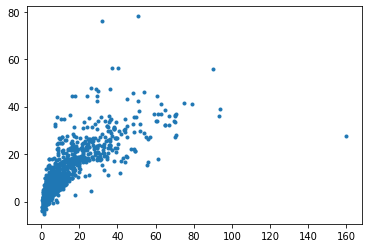

In [33]:
# 추정값과 실제값 비교 시각화
plt.plot(y_test.values, pred_test, '.')


In [34]:

mean_squared_error(y_train, pred)


35.438584169788186

In [35]:
print(model.coef_)
print(model.intercept_)


[ 1.91176636e-02  1.66995369e+00  4.18702583e-01  8.56769426e+00
  6.26239899e-01  1.56103223e+00  2.57094128e+00  9.38537613e-01
  5.58457208e+00  1.22050824e+00  2.71247626e+00  1.39424267e+00
  3.34792741e+00  7.91794098e-01  1.04700484e+00  1.40614924e+00
  6.15125545e+00  6.12122728e+00 -8.64067456e+00 -2.04509515e+00
  1.42406852e+01  2.60007946e+00  5.50862125e+01 -2.40738024e+00
  7.02604960e-01  6.92351140e+00  1.42404930e+01  3.80429031e-02
 -2.52657879e-01  9.58009971e+00  2.48328772e-01 -2.09098429e+00
 -7.44868999e-01  1.19521101e+00 -3.34233268e-01 -4.82817771e-01]
4.239833004897491


In [36]:
import statsmodels.api as sm

In [37]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              648.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:36:44   Log-Likelihood:                         -19426.
No. Observations:                5872   AIC:                                  3.892e+04
Df Residuals:                    5836   BIC:                                  3.917e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [38]:
# p-value가 높은 Tata, Volve 제거
X.drop(['Tata','Volvo'] , axis = 1 , inplace =True)


In [39]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())



                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              686.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:36:44   Log-Likelihood:                         -19426.
No. Observations:                5872   AIC:                                  3.892e+04
Df Residuals:                    5838   BIC:                                  3.915e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [40]:
# p-value가 높은 피쳐 제거
X2 = X.drop(['Mitsubishi','LPG','Nissan','Engine'], axis =1)

In [41]:
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              778.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:36:44   Log-Likelihood:                         -19428.
No. Observations:                5872   AIC:                                  3.892e+04
Df Residuals:                    5842   BIC:                                  3.912e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

-> p-value가 높은 피쳐를 제거해도 정확도는 유의미하게 좋아지지는 않았지만 더 간단한 모델이 되었다.

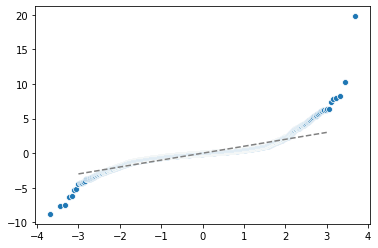

In [42]:
import scipy.stats

# 모델을 통해 얻은 예측값 
pred = result.predict()

# 잔차 = 실제값 - 예측값 
residual = y - result.predict() 

sr = scipy.stats.zscore(residual)
(x1, y1), _ = scipy.stats.probplot(sr)

# 잔차의 정규성
sns.scatterplot(x1, y1)
plt.plot([-3, 3], [-3, 3], '--', color='grey')


<AxesSubplot:>

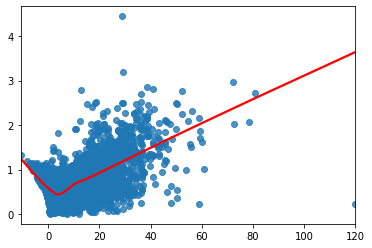

In [43]:


# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

잔차의 정규성과 등분산성 모두 유의미하게 나오지 않았기 때문에 추가적인 모델 수정이 필요할 것 같다.